In [1]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib2D as lib2
import MFI_class2D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_long"): print("\nThe data folder \"_data_long\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_long/"); 
    path_data = path_notebook + "/_data_long/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class2D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_long/


## Invernizzi Potential

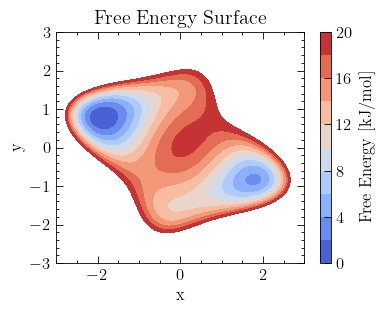

In [3]:
# Define the grid, the potential, the string of the potential and the FES cutoff
grid = np.linspace(-3, 3, 100); 
X, Y = np.meshgrid(grid, grid)
inve_pot = 1.34549*X**4+1.90211*X**3*Y+3.92705*X**2*Y**2-6.44246*X**2-1.90211*X*Y**3+5.58721*X*Y+1.33481*X+1.34549*Y**4-5.55754*Y**2+0.904586*Y+18.5598
inve_pot = inve_pot - np.min(inve_pot)
inve_pot_string = "1.34549*x^4+1.90211*x^3*y+3.92705*x^2*y^2-6.44246*x^2-1.90211*x*y^3+5.58721*x*y+1.33481*x+1.34549*y^4-5.55754*y^2+0.904586*y+18.5598"
plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x,p.y FUNC=({inve_pot_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
FES_cutoff = 20

# Define plumed grid
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, [-4,-4], [4,4])

# plot the free energy surface
plt.contourf(X, Y, inve_pot, levels=np.linspace(0, FES_cutoff, 11), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("x"); plt.ylabel("y"); plt.title("Free Energy Surface"); plt.show()

# Stimulation path
path_invernizzi = path_data + "Invernizzi_Potential/"

In [4]:
# default parameters for the MFI class
default_params = {  "X":X, "Y":Y, "Z":inve_pot, "bw":[0.1, 0.1],
                    "System":"Langevin2D", "plumed_dat_text":plumed_dat_text, "plX":plX, "plY":plY, "simulation_steps":5_000_000, 
                    "position_pace":20, "n_pos_per_window":10, "metad_pace":200, "metad_width":[0.05, 0.05], "metad_height":1, "biasfactor":10,
                    "Bias_sf":1, "gaus_filter_sigma":None,
                    "FES_cutoff":FES_cutoff, "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    "record_maps":True, "record_forces_e":True, "simulation_folder_path": path_invernizzi+"test/", "ID":"", 					
                    }
                  

### MFI2D simulation and analysis (5M steps)

HILLS file already complete. Skipping simulation.
| 100% | AAD: 0.351 [kJ/mol] | Total time: 43 sec                                                            


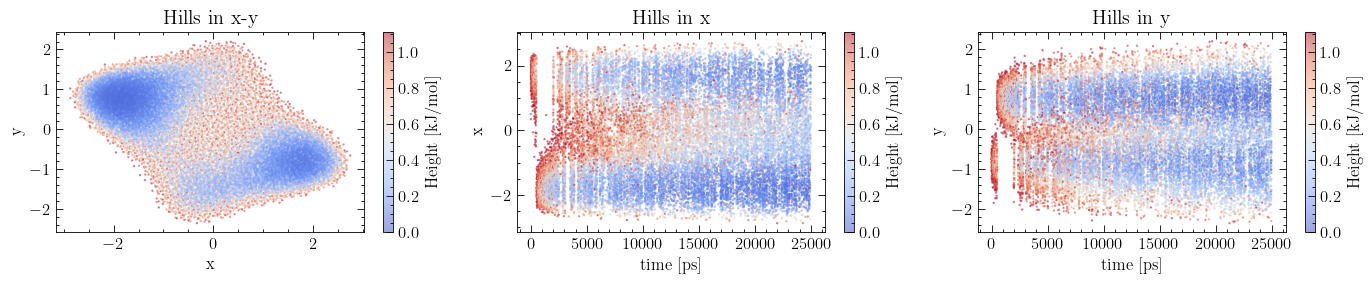

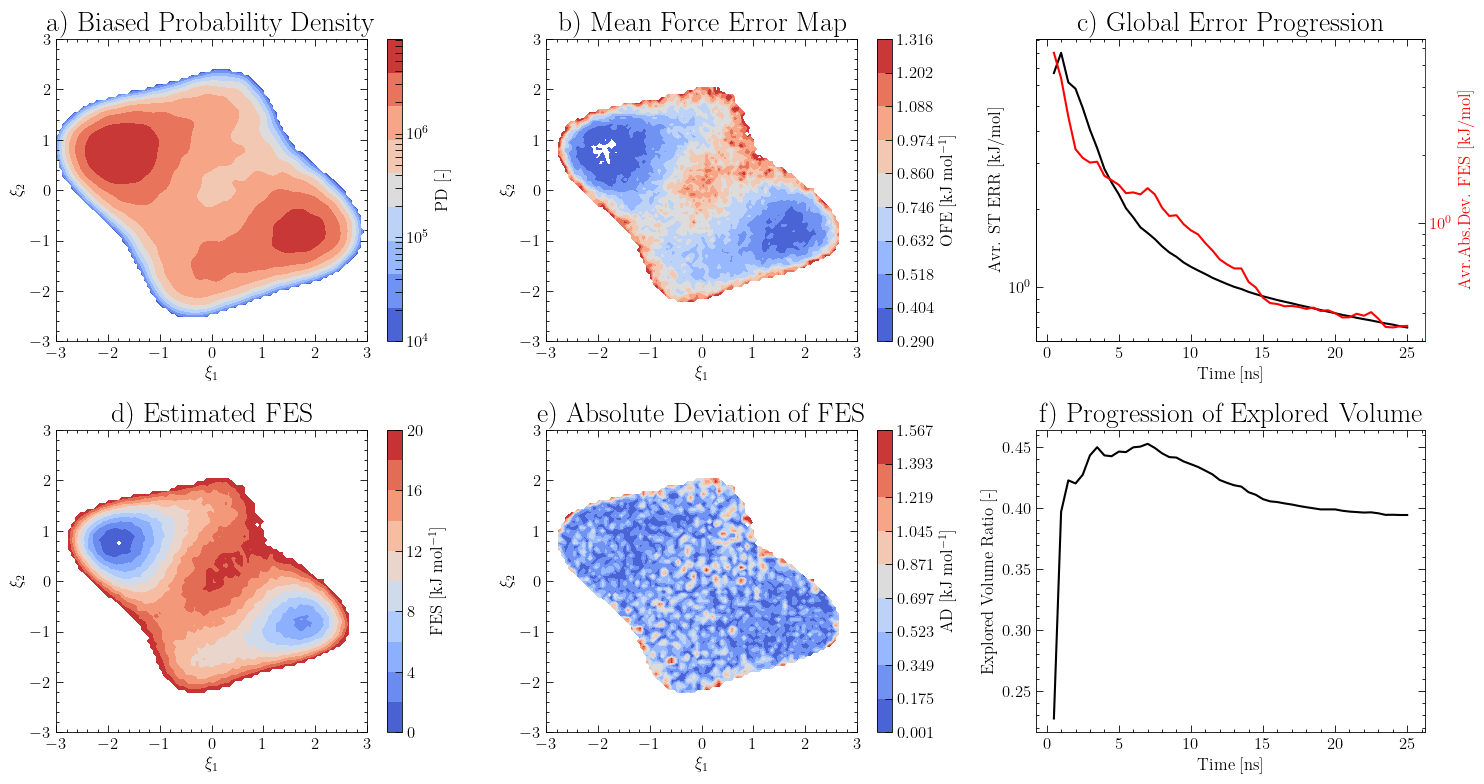

In [5]:
new_params = {**default_params}
new_params.update({"simulation_steps":5_000_000, "ID":"_1_25ns"})

MFI = MFI_class2D.MFI2D(**new_params)

if os.path.isfile(MFI.hills_file) and (lib2.count_lines(MFI.hills_file) > (MFI.simulation_steps / MFI.metad_pace)*0.9): print("HILLS file already complete. Skipping simulation.")
else: MFI.run_simulation(); 

MFI.analyse_data()

lib2.plot_hills_trajectory(MFI.hills)

MFI.plot_results()


### More simulations with different parameters

| 100% | AAD: 0.162 [kJ/mol] | Total time: 36 sec                                                            


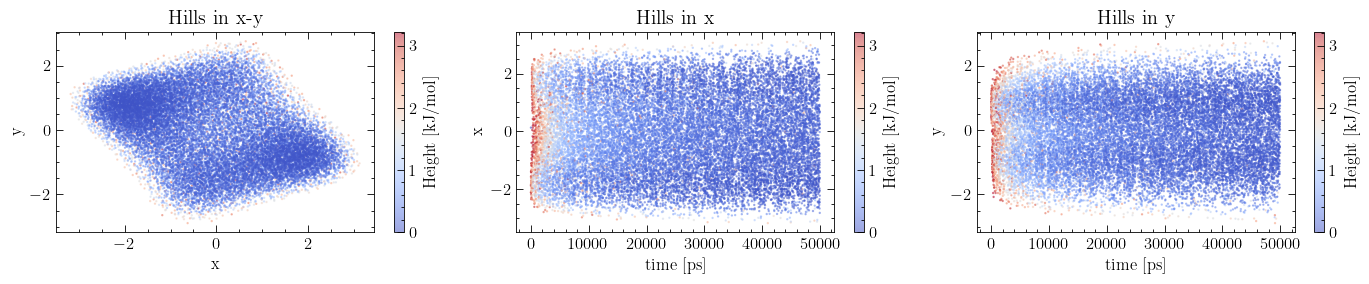

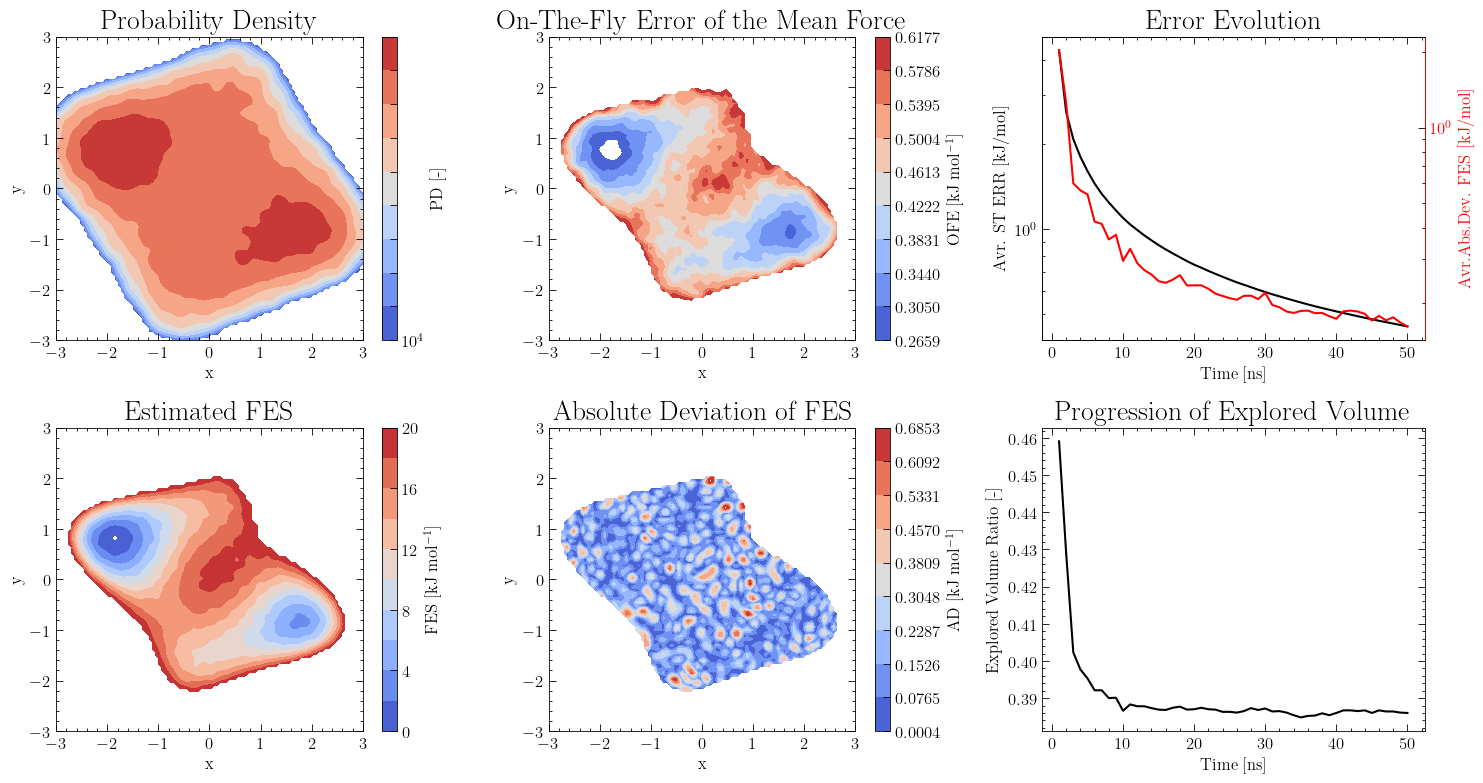

In [38]:
new_params = {**default_params}
new_params.update({"simulation_folder_path": path_invernizzi+"test/"})
                   
### choose the parameters for the simulation
# new_params.update({"ID":"_2_25ns", "metad_height":3, "biasfactor":10, "metad_width":[0.1, 0.1]})
# new_params.update({"ID":"_3_25ns", "metad_height":5, "biasfactor":10, "metad_width":[0.1, 0.1]})
# new_params.update({"ID":"_4_25ns","metad_height":3.8,"biasfactor":19, "metad_width":[0.12, 0.12]})
# new_params.update({"ID":"_5_25ns","metad_height":3.8,"biasfactor":19, "metad_width":[0.2, 0.2]})
new_params.update({"ID":"_6_50ns", "simulation_steps":10_000_000, "metad_pace":500, "position_pace":50, "metad_height":3, "biasfactor":15, "metad_width":[0.12, 0.12]})

# new_params.update({"nhills":15_000})
new_params.update({"calculate_FES_st_dev":True, "bootstrap_iter":50, "len_error_list":100 }) 

MFI = MFI_class2D.MFI2D(**new_params)

if os.path.isfile(MFI.hills_file) and (lib2.count_lines(MFI.hills_file) > (MFI.simulation_steps / MFI.metad_pace)*0.9): print("HILLS file already complete. Skipping simulation.")
else: MFI.run_simulation(); 

MFI.analyse_data()

MFI.load_data(); lib2.plot_hills_trajectory(MFI.hills)

MFI.plot_results()


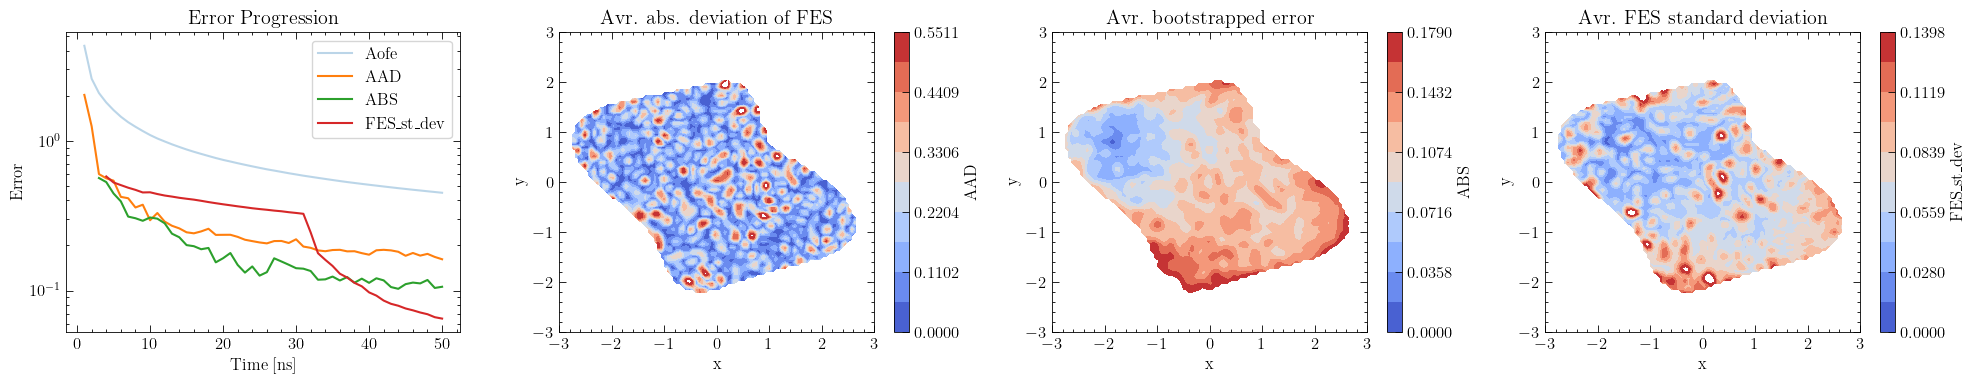

In [40]:
### Plot different error progreesions and maps    
lib2.plot_multiple_error_prog_and_maps(MFI, error_types=["AAD", "ABS", "FES_st_dev"])


Block size 1: sd_fes = 0.1087,  length=50
Block size 3: sd_fes = 0.1195,  length=17
Block size 5: sd_fes = 0.1112,  length=10


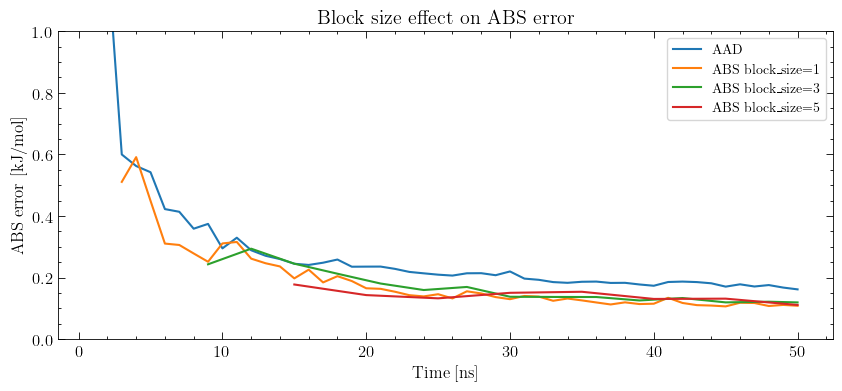

In [41]:
### bootstrap error with increasing BLOCK SIZE
n_bootstrap = 100
plt.figure(figsize=(10,4))
plt.plot(MFI.Avr_Error_list[:,0], MFI.Avr_Error_list[:,MFI.aad_index], label="AAD")

for block_size in [1, 3, 5]:#10]:
    _, _, _, sd_fes_evo_bs, time_bs = lib2.bootstrapping_progression(X,Y,MFI.forces_e_list, time_array=MFI.Avr_Error_list[:,0], n_bootstrap=n_bootstrap, block_size=block_size, periodic=MFI.periodic, FES_cutoff=MFI.FES_cutoff)
    print(f"Block size {block_size}: sd_fes = {sd_fes_evo_bs[-1]:.4f},  length={len(sd_fes_evo_bs)}")
    plt.plot(time_bs, sd_fes_evo_bs, label=f"ABS block_size={block_size}")

plt.ylim(0, 1); plt.title("Block size effect on ABS error"); plt.xlabel("Time [ns]"); plt.ylabel("ABS error [kJ/mol]"); plt.legend(fontsize=10); plt.show()


## Alanine Dipeptide

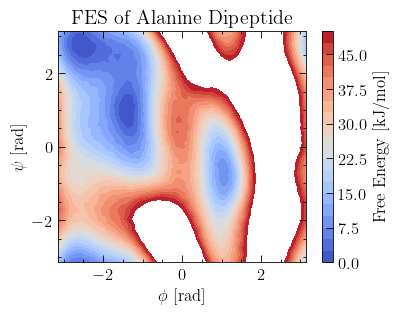

In [2]:
grid = np.linspace(-np.pi, np.pi, 101); 
X, Y = np.meshgrid(grid, grid)
[plX, plY, pl_min, pl_max, pl_n, pl_extra] = lib2.get_plumed_grid_2D(X, Y, periodic=[True, True])

path_AP = path_data + "Alanine_Dipeptide/"
path_input = path_notebook + "/gmx_files/Alanine_Dipeptide/"
plumed_dat_text = f"MOLINFO STRUCTURE={path_input}reference.pdb\nphi: TORSION ATOMS=@phi-2\npsi: TORSION ATOMS=@psi-2\n"

_, _, AP_ref = lib2.load_pkl(path_input + "AP_ref_101x101.pkl")
plt.contourf(X, Y, AP_ref, levels=np.linspace(0, 50, 21), cmap='coolwarm'); plt.colorbar(label="Free Energy [kJ/mol]"); plt.xlabel("$\phi$ [rad]"); plt.ylabel("$\psi$ [rad]"); plt.title("FES of Alanine Dipeptide"); plt.show()

t_compare, v_compare, aofe_compare, aad_compare = lib2.load_pkl(path_input+"AP_10ns_t_v_aofe_aad_prog.pkl")


In [6]:
# default parameters for the MFI class
default_params = {	"X":X, "Y":Y, "Z":AP_ref, "plX":plX, "plY":plY, "periodic":[True, True], "System":"gromacs", "cv_name":["phi","psi"], "plumed_dat_text":plumed_dat_text,
                    "kT":2.49, "time_step":0.001, "simulation_steps":1_00_000, "position_pace":10, "n_pos_per_window":10, 
					"metad_pace":100, "metad_width":[0.1, 0.1], "metad_height":10, "biasfactor":10, "bw":[0.1, 0.1],
         			"len_error_list":50, "FES_cutoff":50.0, # "record_maps":True, "record_forces_e":True, "calculate_FES_st_dev":True, "bootstrap_iter":50,
                    # "save_error_progression":True, "save_force_terms":True, "save_results":True, "save_mfi_instance":True, 
                    # "simulation_folder_path": path_AP+"test/", "ID":"",
                    "simulation_folder_path": path_AP, "ID":"",
				  	
                    "find_sim_init_structure":True, "make_tpr_input_file":True, 
					"trajectory_xtc_file_path_list":[path_input+"traj_0.xtc"], "structure_gro_file_path":path_input+"structure.gro", "mdp_file_path":path_input+"gromppvac.mdp", "top_file_path":path_input+"topology.top", "tpr_file_path":path_input+"input.tpr", "pdb_file_path":path_input+"reference.pdb",
           			}
                  

| 100% | AAD: 0.599 [kJ/mol] | Total time: 2.0 min : 27 sec                                                            


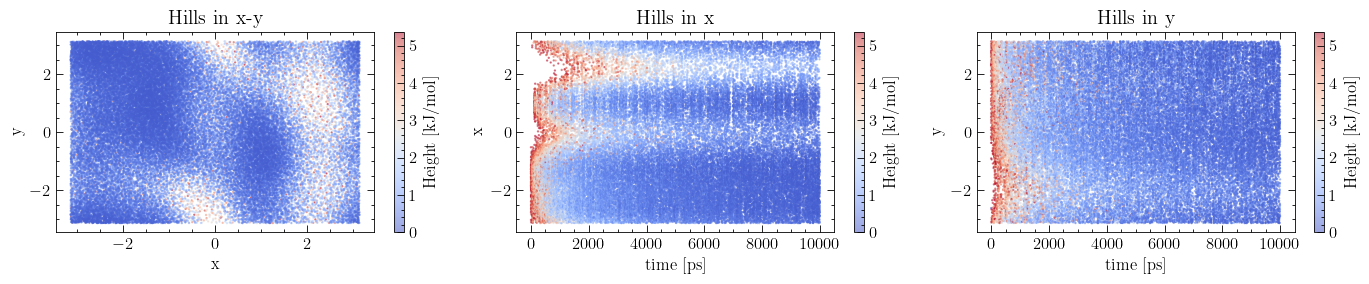

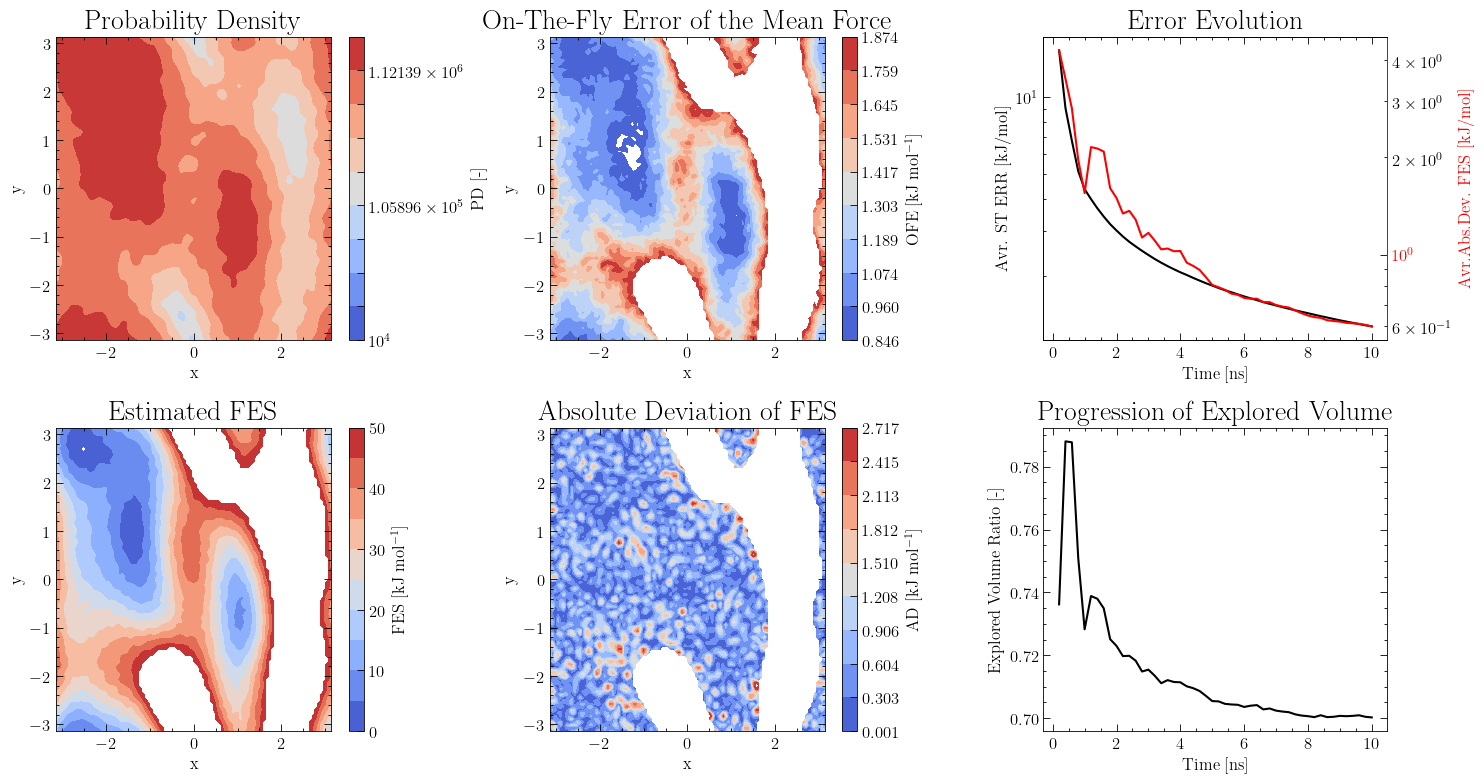

In [10]:
new_params = {**default_params}
new_params.update({"ID":"_10ns", "simulation_folder_path": path_AP})
# new_params.update({"position_pace":20, "metad_pace":200})

MFI = MFI_class2D.MFI2D(**new_params)

if os.path.isfile(MFI.hills_file) and (lib2.count_lines(MFI.hills_file) > (MFI.simulation_steps / MFI.metad_pace)*0.9): print("HILLS file already complete. Skipping simulation.")
else: MFI.run_simulation(); 
# # os.system("rm bck.* stats.out")

MFI.analyse_data()

lib2.plot_hills_trajectory(MFI.hills)

MFI.plot_results()


## Run over night

In [26]:
# default parameters for the MFI class
default_params = {	"X":X, "Y":Y, "bw":[0.1, 0.1], "Z":inve_pot, # "dZ_dX":None, "dZ_dY":None, "initial_position":[0,0], 
					"System":"Langevin2D", "plX":plX, "plY":plY, "simulation_steps":20_000_000, "position_pace":50, "n_pos_per_window":10,
					"metad_pace":500, "metad_width":[0.12, 0.12], "metad_height":3, "biasfactor":15,
					"FES_cutoff":20.0, "len_error_list":200, "calculate_FES_st_dev":True, "bootstrap_iter":50, "save_results":True, "save_error_progression":True, "save_force_terms":False,
					"simulation_folder_path": path_invernizzi, "ID":""}


In [6]:
for n_simulation in range(1,12):
    
    sim_id = f"_{n_simulation}_100ns"
    print(f"--------  {n_simulation = }, with {sim_id = }", end="  ")
    
    if os.path.isfile(path_invernizzi+f"simulation{sim_id}/error_progression{sim_id}.pkl"): 
        print("Results file exists, skipping analysis")
        continue
    print("-----")
    
    default_params.update({"ID":sim_id, "simulation_folder_path":path_invernizzi+f"simulation{sim_id}/"})
    MFI = MFI_class2D.MFI2D(**default_params)
    # os.chdir(MFI.simulation_folder_path)
            
    if os.path.isfile(f"HILLS{sim_id}") and lib2.count_lines(f"HILLS{sim_id}") > (MFI.simulation_steps / MFI.metad_pace)*0.9: print("HILLS file already complete. Skipping simulation.")
    else: MFI.run_simulation(); os.system("rm bck.* stats.out")
            
    MFI.analyse_data()
    # lib2.save_pkl([MFI.force_terms, MFI.Avr_Error_list], path_long+f"results_10M{sim_id}")
        
    

--------  n_simulation = 1, with sim_id = '_1_100ns'  Results file exists, skipping analysis
--------  n_simulation = 2, with sim_id = '_2_100ns'  Results file exists, skipping analysis
--------  n_simulation = 3, with sim_id = '_3_100ns'  Results file exists, skipping analysis
--------  n_simulation = 4, with sim_id = '_4_100ns'  Results file exists, skipping analysis
--------  n_simulation = 5, with sim_id = '_5_100ns'  Results file exists, skipping analysis
--------  n_simulation = 6, with sim_id = '_6_100ns'  Results file exists, skipping analysis
--------  n_simulation = 7, with sim_id = '_7_100ns'  Results file exists, skipping analysis
--------  n_simulation = 8, with sim_id = '_8_100ns'  Results file exists, skipping analysis
--------  n_simulation = 9, with sim_id = '_9_100ns'  Results file exists, skipping analysis
--------  n_simulation = 10, with sim_id = '_10_100ns'  Results file exists, skipping analysis
--------  n_simulation = 11, with sim_id = '_11_100ns'  Results file

In [9]:
path_t = "/home/ucecabj/Desktop/MFI_git/MFI_class2D/_data_long/Invernizzi_Potential/simulation_7_100ns/"

err_t = lib2.load_pkl(path_t+"error_progression_7_100ns.pkl")

# print type, len and shape of err_t
print(f"Type of err_t: {type(err_t)}")
print(f"Length of err_t: {len(err_t)}")
print(f"Shape of err_t: {np.shape(err_t)}")

Type of err_t: <class 'numpy.ndarray'>
Length of err_t: 3
Shape of err_t: (3, 200)


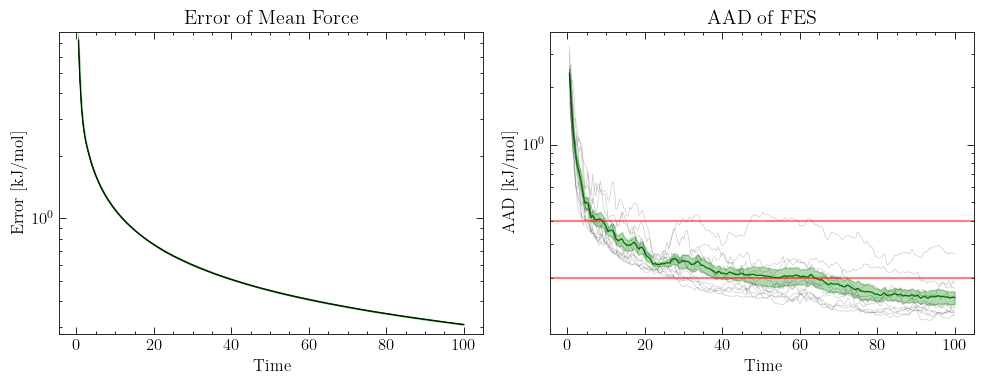

In [10]:
total_campaigns = 11
time_budget = 100

lib2.get_avr_error_prog(path_data=path_invernizzi, total_campaigns=total_campaigns, time_budget=time_budget, include_v=False, include_abs=False, simulation_type="long", show_plot=False)

plt.subplot(1,2,2); 
plt.axhline(0.2, color='r', alpha=0.5)
plt.axhline(0.4, color='r', alpha=0.5)

plt.show()